In [1]:
# Class dependencies
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import torch
from models.folds import Fold, SoftFold
from models.model_bank import DynamicOrigami, Softmax
from models.training import train, NoamScheduler, load_data, plot_model
from torch.utils.data import Dataset, DataLoader



# Other analysis libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_digits

In [32]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="baby's first run",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    print(f"yeet the child{epoch}")

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

yeet the child2
yeet the child3
yeet the child4
yeet the child5
yeet the child6
yeet the child7
yeet the child8
yeet the child9


acc,▁▅▆▆██▇▇
loss,█▃▅▂▂▁▁▁
acc,0.84332
loss,0.06011


In [2]:
# import small digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# set up the model
# model = OrigamiNetwork(layers=1, epochs=300, optimizer='sgd',learning_rate=0.001, sigmoid=True, crease=5)
# model.fit(X_train, y_train, X_val, y_val)

# # get the predictions
# y_hat = model.predict(X_test)
# print(accuracy_score(y_test, y_hat))

In [27]:
leak = 0.00
stretch = False

architecture = [{'type': 'Fold', 'params': {'width':64, 'leak':leak, 'has_stretch': stretch}},
                {'type': 'Fold', 'params': {'width':70, 'leak':leak, 'has_stretch': stretch}},
                {'type': 'Fold', 'params': {'width':80, 'leak':leak, 'has_stretch': stretch}},
                {'type': 'Fold', 'params': {'width':90, 'leak':leak, 'has_stretch': stretch}},
                {'type': 'Fold', 'params': {'width':100, 'leak':leak, 'has_stretch': stretch}}]

architecture2 = [{'type': 'SoftFold', 'params': {'width':100, 'has_stretch': False}}]
blank = [64]

In [24]:
# Data generation
train_loader = load_data(X_train, y_train, batch_size=32, shuffle=True)
val_loader = load_data(X_val, y_val, batch_size=32, shuffle=True)
test_loader = load_data(X_test, y_test, batch_size=32, shuffle=True)

In [ ]:
model = DynamicOrigami(architecture,10)
optimizer = torch.optim.Adam(model.parameters(), lr=.0001)
train_losses, val_losses, train_accuracies, val_accuracies, *learning_rates = train(model, optimizer, train_loader, val_loader, epochs=300, validate_rate=1/300, scheduler=NoamScheduler(optimizer, 1000, 4000, 0.5))
plot_model(train_losses, val_losses, train_accuracies, val_accuracies)
print("final val_score:", np.mean(val_accuracies[-10]))

KeyError: "param 'initial_lr' is not specified in param_groups[0] when resuming an optimizer"

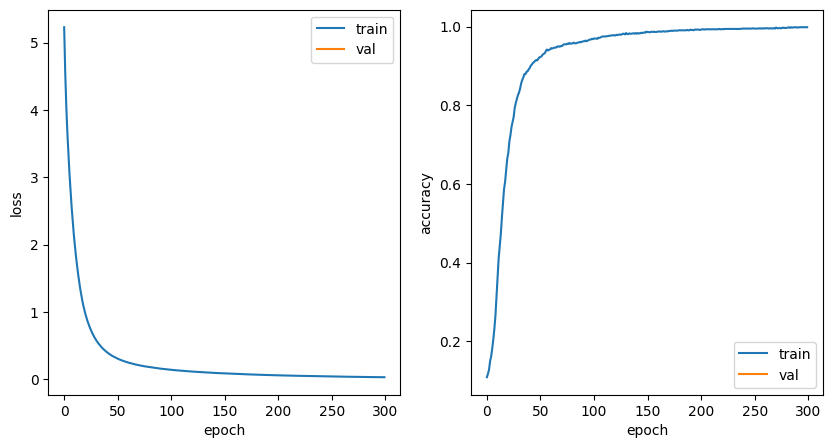

IndexError: list index out of range

In [6]:
model2 = DynamicOrigami(architecture2,10)
optimizer = torch.optim.Adam(model2.parameters(), lr=.0001)
train_losses, val_losses, train_accuracies, val_accuracies, fake = train(model2, optimizer, train_loader, val_loader, epochs=300)
plot_model(train_losses, val_losses, train_accuracies, val_accuracies)
print("final val_score:", np.mean(val_accuracies[-10]))

In [ ]:
# print out all stretch and crease parameters
for layer in model.layers:
    if isinstance(layer, SoftFold):
        # print the layer number
        print(f'Layer {layer}')
        print(f'Crease: {layer.crease.data[0]}')
        print(f'Stretch: {layer.stretch.data}')
        print()

n_vectors = []
a_values = []
stretch_values = []
# print the norm of the fold parameters
for layer in model.layers:
    if isinstance(layer, SoftFold):
        print(torch.norm(layer.n).item())
        n_vectors.append(layer.n.detach().numpy())
        a_values.append(layer.crease.detach().numpy())
        stretch_values.append(layer.stretch.detach().numpy())

linear = model.layers[-1]
weights = linear.weight.detach().numpy()

Layer SoftFold()
Crease: -1.5901776552200317
Stretch: 2.0

Layer SoftFold()
Crease: -0.6160607933998108
Stretch: 2.0

Layer SoftFold()
Crease: 0.33315789699554443
Stretch: 2.0

Layer SoftFold()
Crease: 0.960559606552124
Stretch: 2.0

Layer SoftFold()
Crease: 1.7586315870285034
Stretch: 2.0

1.32813560962677
1.422472596168518
1.3485649824142456
1.2690033912658691
1.379572868347168


ValueError: cannot reshape array of size 70 into shape (8,8)

<Figure size 2000x1000 with 0 Axes>

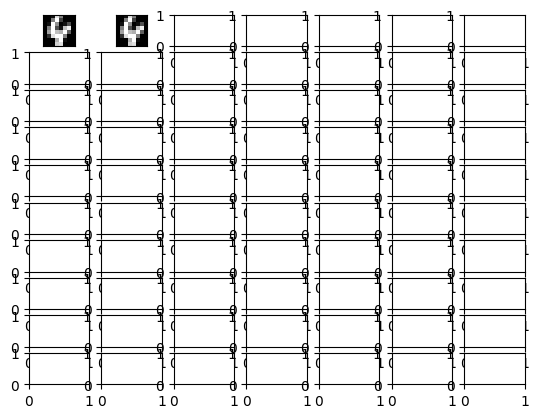

In [ ]:
# # display each of the n vectors in grayscale
# # make the figure larger
# plt.figure(figsize=(20, 10))
# fig, axs = plt.subplots(1, len(n_vectors))
# for i, n in enumerate(n_vectors):
#     axs[i].imshow(n.reshape(8, 8), cmap='gray')
#     axs[i].axis('off')
# plt.show()

# # plot similar noise vectors
# noise = np.random.normal(0, 1, (len(n_vectors), 64))
# plt.figure(figsize=(20, 10))
# fig, axs = plt.subplots(1, len(n_vectors))
# for i, n in enumerate(noise):
#     axs[i].imshow(n.reshape(8, 8), cmap='gray')
#     axs[i].axis('off')
# plt.show()

# # get a single sample of the data and print it
# import numpy as np

# import numpy as np

def soft_folding_transform(alpha, stretch, x, n):
    """
    Performs a soft folding transformation on the 1D input vector x using given parameters.
    
    Args:
        alpha (float): The crease parameter used in the transformation.
        stretch (float): The stretch parameter to scale the orthogonal projection.
        x (np.ndarray): The input vector of shape (input_dim,).
        n (np.ndarray): The normal vector of shape (input_dim,).

    Returns:
        np.ndarray: The transformed vector of shape (input_dim,).
    """
    if n.shape[0] > x.shape[0]:
        x = np.pad(x, (0, n.shape[0] - x.shape[0]), mode='constant')
    elif n.shape[0] < x.shape[0]:
        raise ValueError(f"Input dimension ({x.shape[0]}) is greater than fold width ({n.shape[0]})")

    # Small epsilon for numerical stability
    eps = 1e-8

    # Compute z_dot_x, n_dot_n, and scales
    z_dot_x = np.dot(x, n)  # Scalar result
    n_dot_n = np.dot(n, n) + eps  # Scalar result
    scale = z_dot_x / n_dot_n

    # Compute 'p' and sigmoid
    p = alpha * (z_dot_x - n_dot_n)
    p = np.clip(p, -25.0, 25.0)
    sigmoid = 1 / (1 + np.exp(-p))  # Sigmoid function, scalar

    # Compute the orthogonal projection and the output
    ortho_proj = (1 - scale) * n  # shape: (input_dim,)
    output = x + stretch * sigmoid * ortho_proj  # shape: (input_dim,)
    return output



size = 10
plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(size, len(a_values) + 2)
for j in range(size):
    sample = X_train[j]
    transforms = [sample]
    for i, (a, s, n) in enumerate(zip(a_values, stretch_values, n_vectors)):
        sample = soft_folding_transform(a[0], s, sample, n)
        transforms.append(sample)
    # Add the linear transformation
    sample = np.dot(weights, sample)
    transforms.append(sample)
    for i, t in enumerate(transforms):
        if i == len(transforms) - 1:
            axs[j, i].imshow(t.reshape(10, 1), cmap='gray')
        else:
            axs[j, i].imshow(t.reshape(8, 8), cmap='gray')
        #axs[j, i].axis('off')
        # put a border around all the images
        axs[j, i].set_xticks([])
        axs[j, i].set_yticks([])
        
        
plt.show()
plt.tight_layout()

